# Packages

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

pd.set_option("display.max_columns",50)

# Loading Data

In [2]:
data=pd.read_csv("/content/delhivery_data.txt")
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9.0,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18.0,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27.0,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36.0,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39.0,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# Problem Statement:

**Make the data suitable for building forecasting models on it by cleaning and doing feature engineering.**

# Exploratory Data Analysis

# Shape of the data:
Number of rows and columns

In [3]:
print("Number of rows: ",data.shape[0])
print("Number of columns: ",data.shape[1])

Number of rows:  5460
Number of columns:  24


# Summary statistics

In [4]:
data.describe() 

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000
mean,880.768273,215.867558,216.970249,381.978934,201.280821,265.342989,2.090474,36.222568,18.303719,22.429220,2.278572
std,992.546724,336.202581,336.418659,565.798027,305.279616,414.603425,1.457167,48.766553,11.833789,13.592035,7.363019
min,25.000000,9.000000,9.000267,9.000000,6.000000,9.202000,0.250000,-26.000000,0.000000,0.000000,-1.857143
25%,148.000000,22.000000,22.948256,49.000000,26.000000,28.757800,1.573942,20.000000,11.000000,12.007600,1.346990
50%,379.000000,54.000000,54.442149,116.000000,58.000000,70.677700,1.824427,29.000000,17.000000,23.522900,1.689655
75%,1285.000000,242.000000,242.572677,439.500000,220.500000,288.167050,2.193265,41.000000,22.000000,27.685150,2.250000
max,3230.000000,1690.000000,1690.302865,2873.000000,1549.000000,2095.672900,45.687500,1136.000000,154.000000,215.255200,493.000000


Every numerical column has outliers as there is a significant difference between **mean** and **median**(50% quartile)

The minimum value in **segment_actual_time** time taken by the subset of the package delivery is negative.It does not make sense that the time would be negative.

Also **segment_factor** contains negative values

In [5]:
# Count the number of rows having segment_actual_time is negative
print("Number of rows having segment_actual_time are negative: ",data[data['segment_actual_time']<0].shape[0])

Number of rows having segment_actual_time are negative:  3


In [6]:
 # get the sense of negative data in segment_actual_time
 data[data['segment_actual_time']<0]['segment_actual_time']

1805   -26.0
3761   -21.0
4040    -5.0
Name: segment_actual_time, dtype: float64

In [7]:
# convert the negative values in segment_actual_time into positive
data['segment_actual_time']=np.absolute(data['segment_actual_time'])

In [8]:
data[data['segment_factor']<0]['segment_factor']

47     -1.0
54     -1.0
90     -1.0
164    -1.0
224    -1.0
       ... 
5222   -1.0
5264   -1.0
5268   -1.0
5310   -1.0
5420   -1.0
Name: segment_factor, Length: 88, dtype: float64

# Data types of every column

In [9]:
print("Data types:\n",data.dtypes)

Data types:
 data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                          object
cutoff_factor                     float64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor       

There are couple of attributes whose data type is object.We can convert them into category

# Basic information of the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            5460 non-null   object 
 1   trip_creation_time              5460 non-null   object 
 2   route_schedule_uuid             5460 non-null   object 
 3   route_type                      5459 non-null   object 
 4   trip_uuid                       5459 non-null   object 
 5   source_center                   5459 non-null   object 
 6   source_name                     5438 non-null   object 
 7   destination_center              5459 non-null   object 
 8   destination_name                5451 non-null   object 
 9   od_start_time                   5459 non-null   object 
 10  od_end_time                     5459 non-null   object 
 11  start_scan_to_end_scan          5459 non-null   float64
 12  is_cutoff                       54

The memory usage of the data is more than 25 MB

# Converting some attributes into "category" data type

In [11]:
data['route_type']=data['route_type'].astype("category")
data['is_cutoff']=data['is_cutoff'].astype("category")

# Convert some of the attributes into date time object

In [12]:
cols_datetime=['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp']
for col in cols_datetime:
  data[col]=pd.to_datetime(data[col],infer_datetime_format=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            5460 non-null   object        
 1   trip_creation_time              5460 non-null   datetime64[ns]
 2   route_schedule_uuid             5460 non-null   object        
 3   route_type                      5459 non-null   category      
 4   trip_uuid                       5459 non-null   object        
 5   source_center                   5459 non-null   object        
 6   source_name                     5438 non-null   object        
 7   destination_center              5459 non-null   object        
 8   destination_name                5451 non-null   object        
 9   od_start_time                   5459 non-null   datetime64[ns]
 10  od_end_time                     5459 non-null   datetime64[ns]
 11  star

After converting into category data type the memory usage reduced to 20.5 MB

# Detecting Missing Values

In [14]:
data.isna().sum()

data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         1
trip_uuid                          1
source_center                      1
source_name                       22
destination_center                 1
destination_name                   9
od_start_time                      1
od_end_time                        1
start_scan_to_end_scan             1
is_cutoff                          1
cutoff_factor                      1
cutoff_timestamp                   1
actual_distance_to_destination     1
actual_time                        1
osrm_time                          1
osrm_distance                      1
factor                             1
segment_actual_time                1
segment_osrm_time                  1
segment_osrm_distance              1
segment_factor                     1
dtype: int64

Two attributes have missing values.Namely **source_name** and **destination_name**

# Missing value treatment:
Here some values in **source_name** and **destination_name**  are missing.There are some rows where **source_name** is missing but **destination_name** is there.If we impute missing values using most frequent or other or something else.It does not make sense as the reason for missing values could be technical glitch.Therefore it is better to drop all the missing rows.IT will not hurt the dataset as the dataset has more than 100k data-points 

In [15]:
data.dropna(how="any",inplace=True)

In [16]:
data.shape

(5430, 24)

The original dataset has 144867 rows whereas after removing rows  that having missing values the size of the dataset reduced to 144316.So the data is almost not affected by na values removal.

# Feature Creation and Merging of rows and aggregation of fields

# Aggregation based on these attributes
# 1.Trip_uuid, Source ID(Source Center) and Destination ID(Destination Center)

# 2.Trip_uuid

In [17]:
# drop all the unknown fields
#is_cutoff – Unknown field
#cutoff_factor – Unknown field
#cutoff_timestamp – Unknown field
#factor – Unknown field
#segment_factor – Unknown field
# Also drop "data" column as we are not building a machine learning model ,therefore there is no need of keeping 
# it
data.drop(["data","is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"],axis=1,inplace=True)

# **Segment** related attributes in group by should be summed up using cummulative sum as these are segments(sub-trip)

In [18]:
data['sub_trip_group']=data['trip_uuid']+data['source_center']+data['destination_center']
data['segment_actual_time_total']=data.groupby("sub_trip_group").agg({'segment_actual_time':np.cumsum})
data['segment_osrm_time_total']=data.groupby("sub_trip_group").agg({'segment_osrm_time':np.cumsum})
data['segment_osrm_distance_total']=data.groupby("sub_trip_group").agg({'segment_osrm_distance':np.cumsum})

# Now group by and filter the whole dataset.Take the last value of new created columns as these are cummulative sum

In [19]:
data_sub_trip=data.groupby('sub_trip_group').agg({'trip_creation_time':'first',
                                         'route_schedule_uuid':'first',
                                         'route_type':'first',
                                         'trip_uuid':'first',
                                         'source_center':'first',
                                         'source_name':'first',
                                         'destination_center':'last',
                                         'destination_name':'last',
                                         'od_start_time':'first'	
                                         ,'od_end_time':'first',
                                         'start_scan_to_end_scan':'last',
                                         'actual_distance_to_destination':'last',
                                         'actual_time':'last',
                                         'osrm_time':'first',
                                         'osrm_distance':'first',
                                         'segment_actual_time_total':'last',
                                         'segment_osrm_time_total':'last',
                                         'segment_osrm_distance_total':'last'
    
}).reset_index(drop=True)

# The time taken between od_start_time and od_end_time:
A new feature


In [20]:
# time taken in minutes
data_sub_trip['od_start_end_time_minute']=((data_sub_trip['od_end_time']-data_sub_trip['od_start_time']).dt.total_seconds())/60

In [21]:
# there is no need of keeping attributes:
# od_start_time	
# od_end_time
data_sub_trip.drop(['od_start_time','od_end_time'],axis=1,inplace=True)

# Now aggregate based on trip_uuid to get the information for each trip

In [22]:
data_trip=data_sub_trip.groupby('trip_uuid').agg({'trip_creation_time':'first',
                                         'route_schedule_uuid':'first',
                                         'route_type':'first',
                                         'source_center':'first',
                                         'source_name':'first',
                                         'destination_center':'last',
                                         'destination_name':'last',
                                         'start_scan_to_end_scan':np.sum,
                                         'od_start_end_time_minute':np.sum,
                                         'actual_distance_to_destination':np.sum,
                                         'actual_time':np.sum,
                                         'osrm_time':np.sum,
                                         'osrm_distance':np.sum,
                                         'segment_actual_time_total':np.sum,
                                         'segment_osrm_time_total':np.sum,
                                         'segment_osrm_distance_total':np.sum
    
}).reset_index(drop=True)

In [23]:
data_trip.head()

,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_start_end_time_minute,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total
0,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,IND487001AAB,Narsinghpur_KndliDPP_D (Madhya Pradesh),IND464668AAA,Bareli_SourvDPP_D (Madhya Pradesh),290.0,290.662270,99.975595,253.0,61.0,61.9389,252.0,132.0,140.5623
1,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,Sivasagar_Babupaty_D (Assam),252.0,252.076999,39.495954,241.0,16.0,12.1873,240.0,49.0,56.7577
2,2018-09-12 00:46:48.079257,thanos::sroute:8c5ab716-198a-4395-b83f-5672773...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAB,FBD_Balabhgarh_DPC (Haryana),259.0,260.435888,76.231506,145.0,14.0,19.3214,142.0,55.0,80.1495
3,2018-09-12 01:24:59.938573,thanos::sroute:82facc11-0f66-496b-9d39-fa3891f...,FTL,IND384205AAA,Mehsana_Panchot_IP (Gujarat),IND384205AAA,Mehsana_Panchot_IP (Gujarat),562.0,563.816830,176.405153,345.0,88.0,101.5635,344.0,194.0,212.1026
4,2018-09-12 01:33:48.711350,thanos::sroute:5f7d8d49-ae14-430e-9333-37361e1...,Carting,IND362001AAA,Junagadh_DPC (Gujarat),IND362560AAA,Una_Mamlatdr_DC (Gujarat),473.0,475.195147,208.394342,398.0,74.0,88.6674,391.0,215.0,257.6815


# Feature creation based on the attributes **Destination Name,Source Name,Trip_creation_time**

In [24]:
data_trip['destination_name'][data_trip['destination_name'].str.split("_").str.len()==1] # checking how destination look likes

7                       Erode (Tamil Nadu)
10                Mumbai Hub (Maharashtra)
14                        Palwal (Haryana)
31        Bhopal MP Nagar (Madhya Pradesh)
37                Mumbai Hub (Maharashtra)
53                  Meerut (Uttar Pradesh)
65                       Janakpuri (Delhi)
98                Mumbai Hub (Maharashtra)
120           PNQ Pashan DPC (Maharashtra)
124                       Patiala (Punjab)
162              HBR Layout PC (Karnataka)
172               Mumbai Hub (Maharashtra)
187                      Janakpuri (Delhi)
188    PNQ Vadgaon Sheri DPC (Maharashtra)
195                     Erode (Tamil Nadu)
204               Mumbai Hub (Maharashtra)
222               Mumbai Hub (Maharashtra)
226               Mumbai Hub (Maharashtra)
273               Mumbai Hub (Maharashtra)
289               Mumbai Hub (Maharashtra)
291       Bhopal MP Nagar (Madhya Pradesh)
298                     Jaipur (Rajasthan)
305               Bareilly (Uttar Pradesh)
319        

In [25]:
data_trip['destination_name'][data_trip['destination_name'].str.split("_").str.len()==2] # checking how destination look likes

23       Chennai_Hub (Tamil Nadu)
45          Amritsar_DPC (Punjab)
63       Chennai_Hub (Tamil Nadu)
107        Jaipur_Hub (Rajasthan)
135      Chennai_Hub (Tamil Nadu)
139             GGN_DPC (Haryana)
144           Surat_HUB (Gujarat)
151            Raikot_DC (Punjab)
156          Guwahati_Hub (Assam)
205           Surat_HUB (Gujarat)
211           Tonk_DC (Rajasthan)
221             GGN_DPC (Haryana)
224         Amritsar_DPC (Punjab)
236        Amdavad_East (Gujarat)
268      Hooghly_DC (West Bengal)
272       Ambabadi_DC (Rajasthan)
292             Bhuj_DC (Gujarat)
296             GGN_DPC (Haryana)
301         Bhatinda_DPC (Punjab)
311      Bharatpur_DC (Rajasthan)
313          Guwahati_Hub (Assam)
323            Anjar_DC (Gujarat)
358           Surat_HUB (Gujarat)
367     Bhubaneshwar_Hub (Orissa)
371                 Goa_Hub (Goa)
373      Chennai_Hub (Tamil Nadu)
401        AMD_Memnagar (Gujarat)
425      Guwahati_Sixmile (Assam)
427      Chennai_Hub (Tamil Nadu)
455           

In [26]:
data_trip['destination_name'][data_trip['destination_name'].str.split("_").str.len()==3] # checking how destination look likes

0       Bareli_SourvDPP_D (Madhya Pradesh)
1             Sivasagar_Babupaty_D (Assam)
2             FBD_Balabhgarh_DPC (Haryana)
3             Mehsana_Panchot_IP (Gujarat)
4                Una_Mamlatdr_DC (Gujarat)
                      ...                 
577         Nedumangad_Arsprmbu_D (Kerala)
578            Muzaffrpur_Bbganj_I (Bihar)
580         Radhanpur_Santalpr_D (Gujarat)
581    Chalisgaon_BhadgDPP_D (Maharashtra)
583       Chennai_Thiruvlr_DC (Tamil Nadu)
Name: destination_name, Length: 457, dtype: object

In [27]:
data_trip['source_name'][data_trip['source_name'].str.split("_").str.len()==1] # checking how destination look likes

16                Mumbai Hub (Maharashtra)
31        Bhopal MP Nagar (Madhya Pradesh)
34     PNQ Vadgaon Sheri DPC (Maharashtra)
105              HBR Layout PC (Karnataka)
115               Mumbai Hub (Maharashtra)
124                       Patiala (Punjab)
149                     Jaipur (Rajasthan)
176            Vijayawada (Andhra Pradesh)
189                    Faridabad (Haryana)
197               Mumbai Hub (Maharashtra)
330              HBR Layout PC (Karnataka)
349               Mumbai Hub (Maharashtra)
350                    Faridabad (Haryana)
352                     Salem (Tamil Nadu)
380               Mumbai Hub (Maharashtra)
390               Mumbai Hub (Maharashtra)
412                       Patiala (Punjab)
512                     Vadodara (Gujarat)
554               Mumbai Hub (Maharashtra)
Name: source_name, dtype: object

In [28]:
data_trip['source_name'][data_trip['source_name'].str.split("_").str.len()==2] # checking how destination look likes

4                Junagadh_DPC (Gujarat)
36             Chennai_Hub (Tamil Nadu)
63             Chennai_Hub (Tamil Nadu)
70          LowerParel_CP (Maharashtra)
88     Chennai_Poonamallee (Tamil Nadu)
154            Chennai_Hub (Tamil Nadu)
156              Guwahati_North (Assam)
166         Chittaurgarh_DC (Rajasthan)
172         LowerParel_CP (Maharashtra)
174        Kakinada_DC (Andhra Pradesh)
202               Pune_PC (Maharashtra)
206        Kakinada_DC (Andhra Pradesh)
223               Pune_PC (Maharashtra)
225              Ranchi_Hub (Jharkhand)
233        Kakinada_DC (Andhra Pradesh)
236               AMD_Rakhial (Gujarat)
259                       Goa_Hub (Goa)
287     Bhubaneshwar_Nayapalli (Orissa)
292                  Anjar_DC (Gujarat)
304         LowerParel_CP (Maharashtra)
323                   Bhuj_DC (Gujarat)
329                   GGN_DPC (Haryana)
341              Jaipur_Hub (Rajasthan)
362         LowerParel_CP (Maharashtra)
372              Jaipur_Hub (Rajasthan)


In [29]:
data_trip['source_name'][data_trip['source_name'].str.split("_").str.len()==3] # checking how destination look likes

0      Narsinghpur_KndliDPP_D (Madhya Pradesh)
2                 FBD_Balabhgarh_DPC (Haryana)
3                 Mehsana_Panchot_IP (Gujarat)
5                      Delhi_Airport_H (Delhi)
6             Dinhata_WrdN4DPP_D (West Bengal)
                        ...                   
578                Muzaffrpur_Bbganj_I (Bihar)
579                Ahmedabad_Paldi_D (Gujarat)
581             Dhule_MIDCAvdn_I (Maharashtra)
582           Hapur_Swargash_D (Uttar Pradesh)
583             Chennai_Porur_DPC (Tamil Nadu)
Name: source_name, Length: 470, dtype: object

In [30]:
# utility functions to extract state,city,place,and code
def extract_state(x):
  # x is a string
  # eg: x is like "Kanpur_Central_H_6 (Uttar Pradesh)"
  idx=x.index("(") # index of "(" 
  state=x[idx+1:-1] # removing )
  return state

def extract_city(x):
  # x is a string like "Kanpur_Central_H_6 (Uttar Pradesh)" 
  # it can also be like PNQ Rahatani DPC (Maharashtra)
    x=x[:x.index("(")].strip() # removing state and extra space
    x=x.split("_") # split based on "_"
    if len(x)==1:
      if x[0].lower()=='pnq vadgaon sheri dpc':
        return 'Vadgaonsheri'
      if x[0].lower() in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return "Pune"
      if x[0].lower()=='hbr layout pc':
        return "Bengaluru"
      if x[0].lower()=="bhopal mp nagar":
        return "Bhopal"
      if x[0].lower()=="mumbai antop hill":
        return "Mumbai"
      return x[0]
    return x[0]
    

def extract_place(x):
  x=x[:x.index("(")].strip() # remove state and extra space
  x=x.split("_")
  # no city name
  if len(x)==1:
    return x[0]
  
  if len(x)>=3:
    return x[1]
  # city name and place name same
  if len(x)==2:
    return x[0]
  
def extract_code(x):
  x=x[:x.index("(")].strip() # remove state and extra space
  x=x.split("_")

  if len(x)>=2:
    return x[-1]
  return "none" # no code

# Destination Name:

In [31]:
data_trip['destination_state']=data_trip['destination_name'].apply(extract_state)
data_trip['destination_city']=data_trip['destination_name'].apply(extract_city)
data_trip['destination_place']=data_trip['destination_name'].apply(extract_place)
data_trip['destination_code']=data_trip['destination_name'].apply(extract_code)


In [32]:
data_trip[['destination_name','destination_state','destination_city','destination_place','destination_code']].head()

,destination_name,destination_state,destination_city,destination_place,destination_code
0,Bareli_SourvDPP_D (Madhya Pradesh),Madhya Pradesh,Bareli,SourvDPP,D
1,Sivasagar_Babupaty_D (Assam),Assam,Sivasagar,Babupaty,D
2,FBD_Balabhgarh_DPC (Haryana),Haryana,FBD,Balabhgarh,DPC
3,Mehsana_Panchot_IP (Gujarat),Gujarat,Mehsana,Panchot,IP
4,Una_Mamlatdr_DC (Gujarat),Gujarat,Una,Mamlatdr,DC


# Source Name

In [33]:
data_trip['source_state']=data_trip['source_name'].apply(extract_state)
data_trip['source_city']=data_trip['source_name'].apply(extract_city)
data_trip['source_place']=data_trip['source_name'].apply(extract_place)
data_trip['source_code']=data_trip['source_name'].apply(extract_code)


In [34]:
data_trip[['source_name','source_state','source_city','source_place','source_code']].head()

,source_name,source_state,source_city,source_place,source_code
0,Narsinghpur_KndliDPP_D (Madhya Pradesh),Madhya Pradesh,Narsinghpur,KndliDPP,D
1,Sonari_Central_DPP_1 (Assam),Assam,Sonari,Central,1
2,FBD_Balabhgarh_DPC (Haryana),Haryana,FBD,Balabhgarh,DPC
3,Mehsana_Panchot_IP (Gujarat),Gujarat,Mehsana,Panchot,IP
4,Junagadh_DPC (Gujarat),Gujarat,Junagadh,Junagadh,DPC


# Trip_creation_time: Extract features like month, year and day etc

In [35]:
data_trip['trip_creation_year']=data_trip['trip_creation_time'].dt.year
data_trip['trip_creation_month']=data_trip['trip_creation_time'].dt.month
data_trip['trip_creation_day']=data_trip['trip_creation_time'].dt.day
data_trip['trip_creation_week']=data_trip['trip_creation_time'].dt.isocalendar().week
data_trip['trip_creation_dayofweek']=data_trip['trip_creation_time'].dt.dayofweek

In [36]:
# drop columns trip_creation_time,destination_name,source_name
data_trip.drop(['trip_creation_time','source_name','destination_name'],axis=1,inplace=True)

In [37]:
data_trip.head()

,route_schedule_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,od_start_end_time_minute,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_week,trip_creation_dayofweek
0,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,IND487001AAB,IND464668AAA,290.0,290.662270,99.975595,253.0,61.0,61.9389,252.0,132.0,140.5623,Madhya Pradesh,Bareli,SourvDPP,D,Madhya Pradesh,Narsinghpur,KndliDPP,D,2018,9,12,37,2
1,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,IND785690AAB,IND785682AAA,252.0,252.076999,39.495954,241.0,16.0,12.1873,240.0,49.0,56.7577,Assam,Sivasagar,Babupaty,D,Assam,Sonari,Central,1,2018,9,12,37,2
2,thanos::sroute:8c5ab716-198a-4395-b83f-5672773...,Carting,IND121004AAB,IND121004AAB,259.0,260.435888,76.231506,145.0,14.0,19.3214,142.0,55.0,80.1495,Haryana,FBD,Balabhgarh,DPC,Haryana,FBD,Balabhgarh,DPC,2018,9,12,37,2
3,thanos::sroute:82facc11-0f66-496b-9d39-fa3891f...,FTL,IND384205AAA,IND384205AAA,562.0,563.816830,176.405153,345.0,88.0,101.5635,344.0,194.0,212.1026,Gujarat,Mehsana,Panchot,IP,Gujarat,Mehsana,Panchot,IP,2018,9,12,37,2
4,thanos::sroute:5f7d8d49-ae14-430e-9333-37361e1...,Carting,IND362001AAA,IND362560AAA,473.0,475.195147,208.394342,398.0,74.0,88.6674,391.0,215.0,257.6815,Gujarat,Una,Mamlatdr,DC,Gujarat,Junagadh,Junagadh,DPC,2018,9,12,37,2


# Outliers detection using boxplot and removing them using IQR:


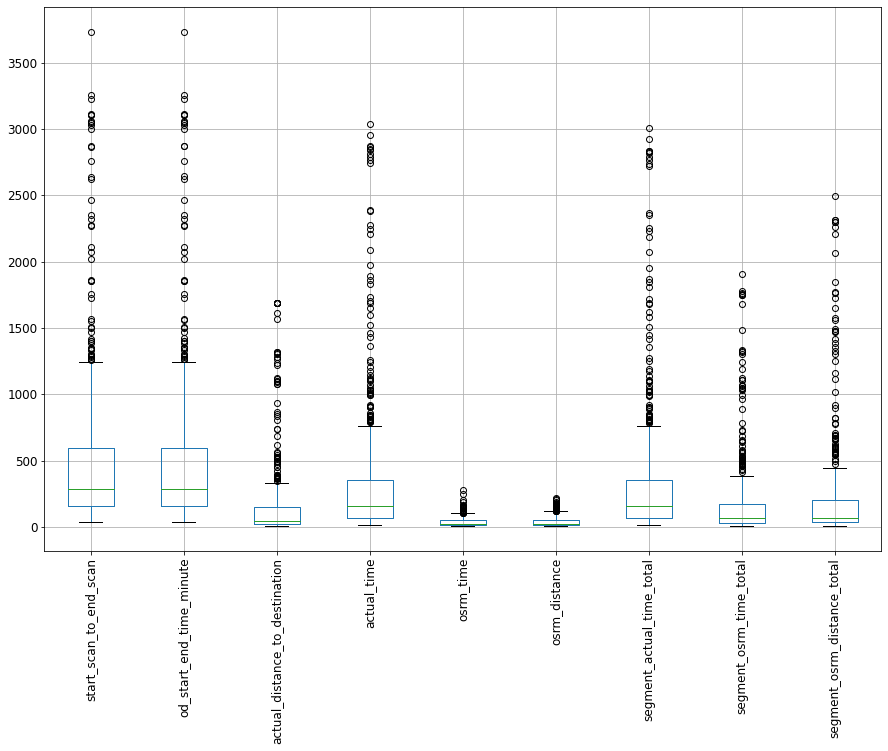

In [38]:
cols_with_outliers=['start_scan_to_end_scan',
       'od_start_end_time_minute', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance',
       'segment_actual_time_total', 'segment_osrm_time_total',
       'segment_osrm_distance_total']
fig,ax=plt.subplots(figsize=(15,10))
data_trip[cols_with_outliers].boxplot(rot=90,ax=ax,fontsize='large')
plt.show()

According to box-plot all the numerical columns have outliers

In [39]:
# handling outliers
Q1 = data_trip[cols_with_outliers].quantile(0.25) # first quantile
Q3 = data_trip[cols_with_outliers].quantile(0.75) # third quantile

IQR = Q3 - Q1 # inter-quantile range

data_trip = data_trip[~((data_trip[cols_with_outliers] < (Q1 - 1.5 * IQR)) | (data_trip[cols_with_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Range of values for some of the attributes

In [40]:
data['route_type'].value_counts()

FTL        3714
Carting    1716
Name: route_type, dtype: int64

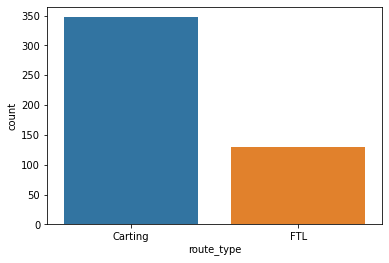

In [41]:
sns.countplot(x='route_type',data=data_trip)

There are only two types of route.**FTL** being in heighest number.

In [42]:
data_trip.describe()

,start_scan_to_end_scan,od_start_end_time_minute,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_week,trip_creation_dayofweek
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0,477.000000,477.000000,477.000000,477.000000
mean,290.121593,290.921408,63.867098,160.368973,26.834382,29.451820,158.962264,75.496855,86.181545,2018.0,9.132075,17.807128,38.262055,2.935010
std,211.280554,211.514831,61.398939,135.660856,21.752906,25.199297,134.700518,65.821525,81.046798,0.0,0.338928,7.993729,1.000255,1.958061
min,34.000000,34.522275,9.169091,13.000000,6.000000,9.306800,13.000000,8.000000,9.875900,2018.0,9.000000,1.000000,37.000000,0.000000
25%,138.000000,138.528613,21.264406,62.000000,12.000000,12.182200,61.000000,28.000000,29.624600,2018.0,9.000000,14.000000,37.000000,1.000000
50%,225.000000,225.162093,36.008738,112.000000,18.000000,16.794600,110.000000,49.000000,50.955300,2018.0,9.000000,18.000000,38.000000,3.000000
75%,393.000000,394.080267,93.965201,227.000000,34.000000,35.507100,224.000000,109.000000,129.412300,2018.0,9.000000,24.000000,39.000000,5.000000
max,1216.000000,1218.061670,308.977925,761.000000,101.000000,117.478300,759.000000,327.000000,428.258700,2018.0,10.000000,30.000000,40.000000,6.000000


The minimum amd maximum times for start_scan_to_end_scan are 34 and 3230 respectively.So there is a huge gap between these two values.On the other hand the min and max values for od_start_end_time_minute are very close to the scan times.



In [43]:
data_trip['destination_state'].value_counts()

Maharashtra        87
Karnataka          83
Haryana            49
Tamil Nadu         39
Gujarat            25
West Bengal        24
Delhi              23
Uttar Pradesh      21
Punjab             19
Telangana          18
Rajasthan          16
Andhra Pradesh     16
Kerala             13
Madhya Pradesh     12
Bihar              10
Assam               6
Jharkhand           4
Orissa              4
Chhattisgarh        2
Uttarakhand         2
Goa                 2
Jammu & Kashmir     1
Chandigarh          1
Name: destination_state, dtype: int64

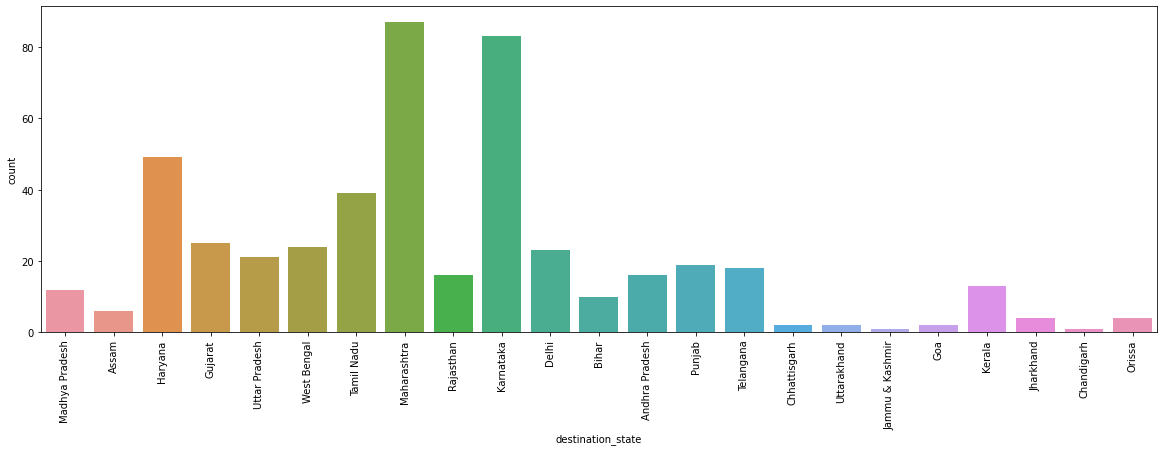

In [44]:
fig,ax=plt.subplots(figsize=(20,6))
ax=sns.countplot(x='destination_state',data=data_trip)
plt.xticks(rotation=90)
plt.show()

**Business Insights:** 
1. Maharashtra being heighest in terms of delivery then followed by Karnataka.Lowest is the chhattisgarh.

2. The north,west and south corridors have heavy trafic of orders.

3. On the other hand the central corridor,east and north eastern (states like Delhi,Chhattisgarh,Uttrakhand,Goa,etc) have less traffic of orders. 


In [45]:
data_trip['trip_creation_year'].value_counts()

2018    477
Name: trip_creation_year, dtype: int64

The delivery are only from the year **2018**

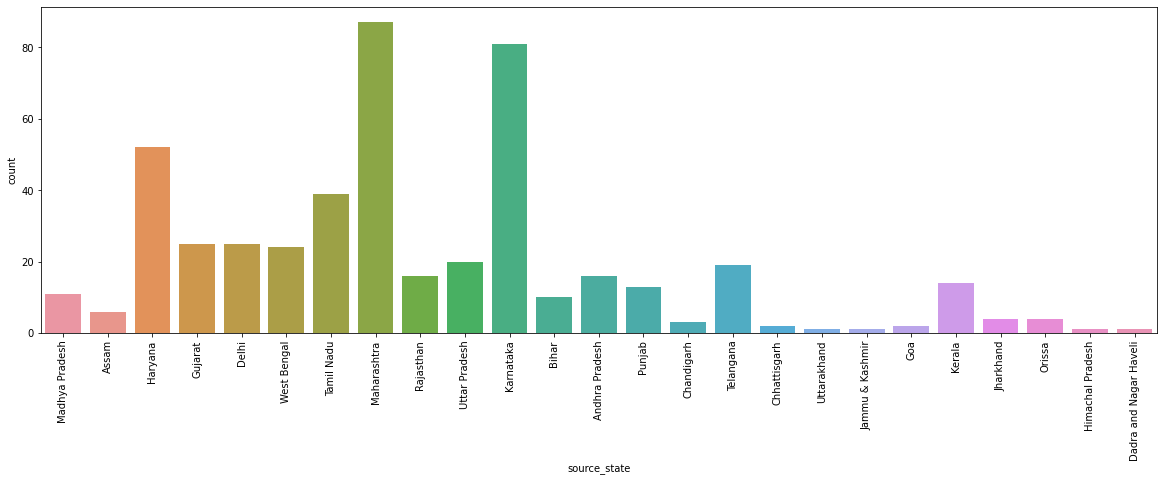

In [46]:
fig,ax=plt.subplots(figsize=(20,6))
ax=sns.countplot(x='source_state',data=data_trip)
plt.xticks(rotation=90)
plt.show()

**Business Insights:**

1. **Maharashtra** being heighest in terms of producing products.

2. There are many states (Uttrakhand,Himachal Pradesh,Goa,etc) with very less of presence of products.

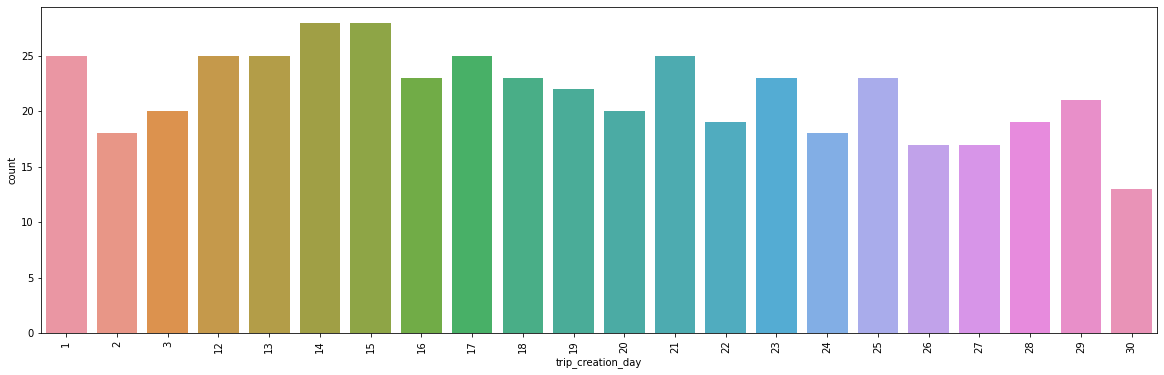

In [47]:
fig,ax=plt.subplots(figsize=(20,6))
ax=sns.countplot(x='trip_creation_day',data=data_trip)
plt.xticks(rotation=90)
plt.show()

**Business Insights:** Its surprising that the most of the trip(deliveries) created bteween day 12 and day 30

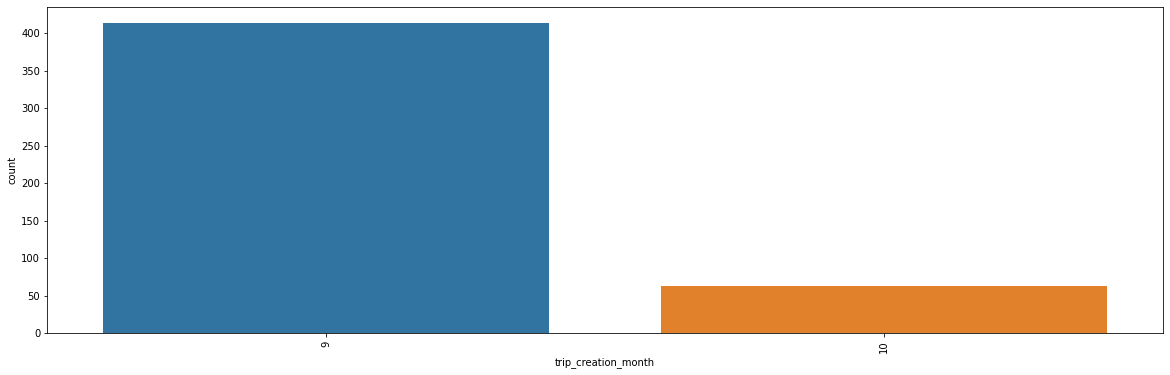

In [48]:
fig,ax=plt.subplots(figsize=(20,6))
ax=sns.countplot(x='trip_creation_month',data=data_trip)
plt.xticks(rotation=90)
plt.show()

**Business Insights**:This is strange the most of the deliveries made on september

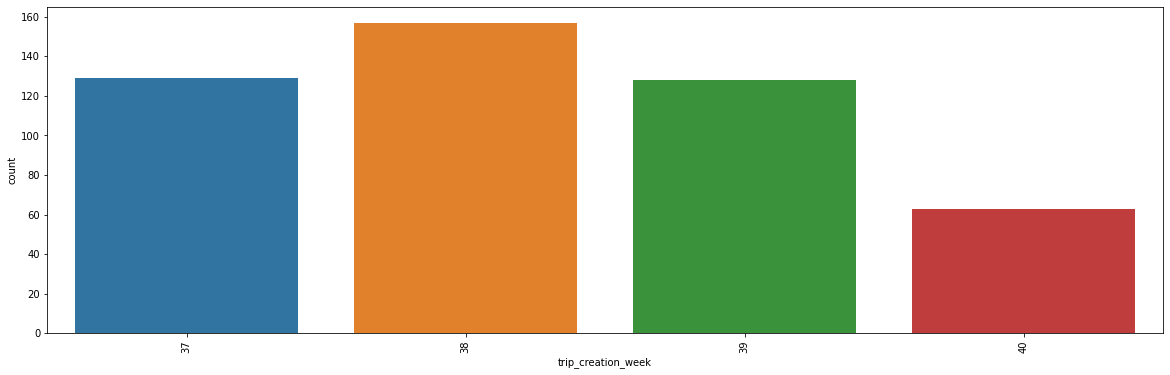

In [49]:
fig,ax=plt.subplots(figsize=(20,6))
ax=sns.countplot(x='trip_creation_week',data=data_trip)
plt.xticks(rotation=90)
plt.show()

**Business Insights:** Its surprising that the weeks other than 37,38,39,and 40 no deliveries made.This could be due to the fact of collection of data.

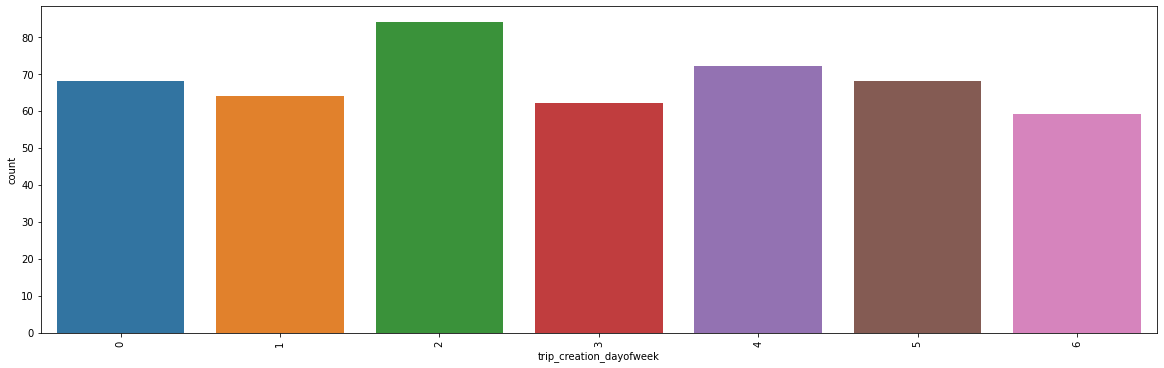

In [50]:
fig,ax=plt.subplots(figsize=(20,6))
ax=sns.countplot(x='trip_creation_dayofweek',data=data_trip)
plt.xticks(rotation=90)
plt.show()

**Business Insights:** Everyday of a week more or less has same number of deliveries

# Handling Categorical Values:

Hnadling some of the attributes like destination_state,route_type,source_state,etc

In [51]:
data_trip['route_type']=data_trip['route_type'].map({'FTL':0,'Carting':1})

In [52]:
# converting destination state into numerical values
# using probability frequency
dest_dict=data_trip['destination_state'].value_counts().to_dict()
total_count=sum(dest_dict.values())
for key in dest_dict:
  dest_dict[key]=dest_dict[key]/total_count # calculate probability
data_trip['destination_state_encoded']=data_trip['destination_state'].map(dest_dict)


# similarly do for source state
source_dict=data_trip['source_state'].value_counts().to_dict()
total_count=sum(source_dict.values())
for key in source_dict:
  source_dict[key]=source_dict[key]/total_count # calculate probability
data_trip['source_state_encoded']=data_trip['source_state'].map(source_dict)



In [53]:
data_trip.destination_state_encoded.head()

0    0.025157
1    0.012579
2    0.102725
3    0.052411
4    0.052411
Name: destination_state_encoded, dtype: float64

# Checking relationship between aggregated fields and hypothesis testing

### Hypothesis testing between start_scan_to_end_scan and time difference of od_start_time and od_end_time

And visualization: histogram

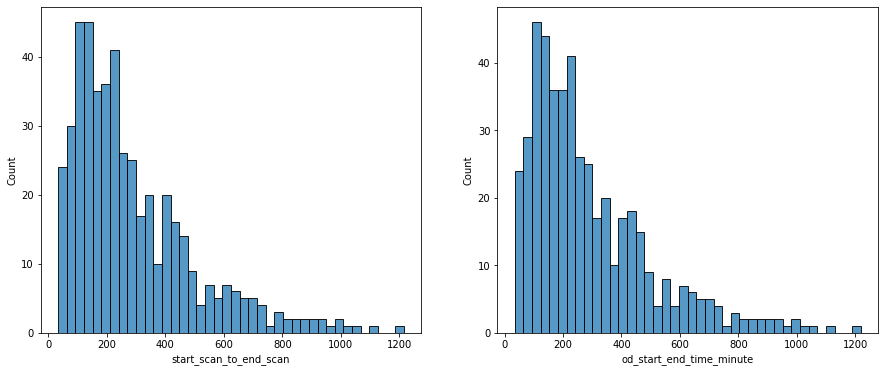

In [54]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax=ax.flatten()
sns.histplot(x='start_scan_to_end_scan',data=data_trip,ax=ax[0],bins=40)
sns.histplot(x='od_start_end_time_minute',data=data_trip,ax=ax[1],bins=40)
plt.show()

Great resemblance between the two histograms.From histogram it is clear that the data has still some sort of outliers.But we can live this.

### confidence interval for both **scan time and od time**

In [55]:
# find confidence interval
means_scan=[]
means_od=[]
nsim=1000 # 100 bootstrap simulations
sample_size=100 # sample size is 100
for _ in range(nsim):
  sample=data_trip['start_scan_to_end_scan'].sample(sample_size)
  means_scan.append(sum(sample)/len(sample))

  sample=data_trip['od_start_end_time_minute'].sample(sample_size)
  means_od.append(sum(sample)/len(sample))


# confidence interval for means
interval_scan=[np.percentile(means_scan,2.5),np.percentile(means_scan,97.5)] # 2.5th and 97.5th percentiles ,with 5% level of significance
interval_od=[np.percentile(means_od,2.5),np.percentile(means_od,97.5)]

print("Confidence interval for the mean of scan time: ",interval_scan)

print("Confidence interval for the mean of od time: ",interval_od)
          

Confidence interval for the mean of scan time:  [255.33325, 326.495]
Confidence interval for the mean of od time:  [254.23816766421683, 332.2286531487792]


**The 95% confidence interval for both scan time and od time is almost same.
This tells that there is no significance difference between scan time and od time**

Applying t-test on the right skewd distributed data would be misleading as means heavily affected by outliers,we will remove the outliers(using IQR) and then carry out the test.


### H0:Means of scan time and od time are equal
### H1: otherwise

In [56]:
# removing outliers for both scan time and od time
Q1=data_trip['start_scan_to_end_scan'].quantile(0.25) 
Q3=data_trip['start_scan_to_end_scan'].quantile(0.75)
IQR=Q3-Q1
scan=data_trip['start_scan_to_end_scan']
logical=((Q1-1.5*IQR)<scan ) & (scan<(Q3+1.5*IQR))
scan_data=data_trip['start_scan_to_end_scan'][logical]

# similarly do for od time
Q1=data_trip['od_start_end_time_minute'].quantile(0.25) 
Q3=data_trip['od_start_end_time_minute'].quantile(0.75)
IQR=Q3-Q1
od=data_trip['od_start_end_time_minute']
logical=((Q1-1.5*IQR)<od ) & (od<(Q3+1.5*IQR))
od_data=data_trip['od_start_end_time_minute'][logical]


# hypothesis testing for equality of means
# paired t-test: as the both time depends on the delivery.

test_statistics,p_value=st.ttest_rel(scan_data,od_data) # two-sided paired t-test

print("Test-statistics:",test_statistics)
print("P-value:",p_value)



Test-statistics: -29.615008802193312
P-value: 2.2461833908056246e-108


If we consider 5% level of significance,the **p-value** is way less than 0.05.Therefore null hypothesis must i.e the mean of **scan time** and the mean of  **od time** are not equal.

### hypothesis test between actual_time aggregated value and OSRM time aggregated value

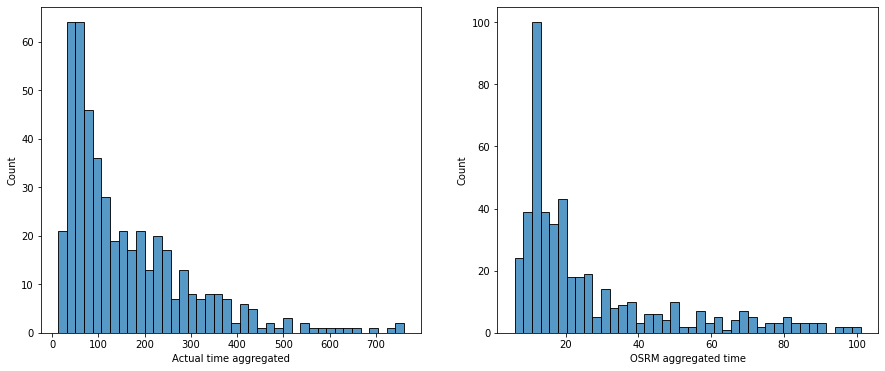

In [57]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax=ax.flatten()
sns.histplot(x='actual_time', data=data_trip,ax=ax[0],bins=40) # aggregate actual time
ax[0].set_xlabel("Actual time aggregated")
sns.histplot(x='osrm_time',data=data_trip,ax=ax[1],bins=40) # OSRM aggregated time
ax[1].set_xlabel("OSRM aggregated time")
plt.show()

Both actual and osrm aggregated time are right skewd distribution.ANOVA can't be applied here because the data are not normal

### confidence interval of means for both the actual time(aggregated) and osrm time(aggregated)

In [58]:
# find confidence interval
means_actual=[]
means_osrm=[]
nsim=1000 # 100 bootstrap simulations
sample_size=100 # sample size is 100
for _ in range(nsim):
  sample=data_trip['actual_time'].sample(sample_size)
  means_actual.append(sum(sample)/len(sample))

  sample=data_trip['osrm_time'].sample(sample_size)
  means_osrm.append(sum(sample)/len(sample))


# confidence interval for means
interval_actual=[np.percentile(means_actual,2.5),np.percentile(means_actual,97.5)] # 2.5th and 97.5th percentiles ,with 5% level of significance
interval_osrm=[np.percentile(means_osrm,2.5),np.percentile(means_osrm,97.5)]

print("Confidence interval for actual time(aggregated): ",interval_actual)
print("Confidence interval for OSRM time(aggregated): ",interval_osrm)



Confidence interval for actual time(aggregated):  [137.24775, 185.79325]
Confidence interval for OSRM time(aggregated):  [23.13, 30.850250000000003]


There is no overlap between the intervals.According to confidence intervals there is no relation between actual time taken to deliver a product and osrm time(machine genrated time).

It proves machine generated time is not accordance with the actual time

### H0:Means of actual time and OSRM time are equal
### H1: otherwise

Actual time depends on the delivery whereas OSRM time is machine generated,therefore we will do independent t-test for hypothesis test

In [59]:
# first remove outliers
Q1=data_trip['actual_time'].quantile(0.25) 
Q3=data_trip['actual_time'].quantile(0.75)
IQR=Q3-Q1
actual=data_trip['actual_time']
logical=((Q1-1.5*IQR)<actual ) & (actual<(Q3+1.5*IQR))
actual_data=data_trip['actual_time'][logical]

# similarly do for od time
Q1=data_trip['osrm_time'].quantile(0.25) 
Q3=data_trip['osrm_time'].quantile(0.75)
IQR=Q3-Q1
osrm=data_trip['osrm_time']
logical=((Q1-1.5*IQR)<osrm ) & (osrm<(Q3+1.5*IQR))
osrm_data=data_trip['osrm_time'][logical]
test_statistics,p_value=st.ttest_ind(osrm_data,actual_data,
                                     equal_var=True, random_state=2022, alternative='two-sided')
print("Test-statistics:",test_statistics)
print("P-value:",p_value)


Test-statistics: -23.723659699899443
P-value: 8.465203154007822e-97


Again the p-values is very low ,way less than 5% level of significance.Therefore the null hypothesis must that is the mean of actual time is not same as mean of osrm time

### Hypothesis tesing between actual_time aggregated value and segment actual time aggregated value.

**H0: Means of actual time(aggregated) and actual segement time(aggregated) are equal**

**H1:otherwise**

### Confidence interval of actual time(aggregated) and segment_time(aggregated)

In [60]:
# find confidence interval
means_actual=[]
means_actual_seg=[]
nsim=1000 # 100 bootstrap simulations
sample_size=100 # sample size is 100
for _ in range(nsim):
  sample=data_trip['actual_time'].sample(sample_size)
  means_actual.append(sum(sample)/len(sample))

  sample=data_trip['segment_actual_time_total'].sample(sample_size)
  means_actual_seg.append(sum(sample)/len(sample))


# confidence interval for means
interval_actual=[np.percentile(means_actual,2.5),np.percentile(means_actual,97.5)] # 2.5th and 97.5th percentiles ,with 5% level of significance
interval_actual_seg=[np.percentile(means_actual_seg,2.5),np.percentile(means_actual_seg,97.5)]

print("Confidence interval for actual time(aggregated): ",interval_actual)
print("Confidence interval for actual segment time(aggregated): ",interval_osrm)



Confidence interval for actual time(aggregated):  [137.67925, 184.40075000000002]
Confidence interval for actual segment time(aggregated):  [23.13, 30.850250000000003]


There is a significant difference between the confidence intervals.segment actual time is faster than the actual time.

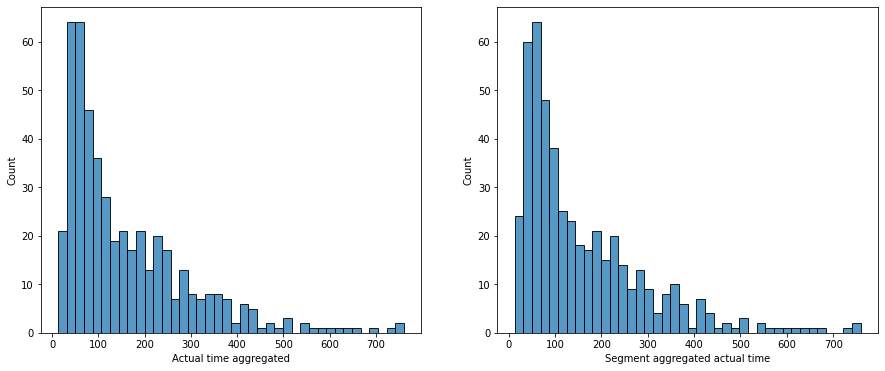

In [61]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax=ax.flatten()
sns.histplot(x='actual_time', data=data_trip,ax=ax[0],bins=40) # aggregate actual time
ax[0].set_xlabel("Actual time aggregated")
sns.histplot(x='segment_actual_time_total',data=data_trip,ax=ax[1],bins=40) # segment aggregated actual time
ax[1].set_xlabel("Segment aggregated actual time")
plt.show()

Again the data distribution are right skewed.The data has outliers we will remove and then carry out t-test

In [62]:
# first remove outliers
Q1=data_trip['actual_time'].quantile(0.25) 
Q3=data_trip['actual_time'].quantile(0.75)
IQR=Q3-Q1
actual=data_trip['actual_time']
logical=((Q1-1.5*IQR)<actual ) & (actual<(Q3+1.5*IQR))
actual_data=data_trip['actual_time'][logical]

# similarly do for od time
Q1=data_trip['segment_actual_time_total'].quantile(0.25) 
Q3=data_trip['segment_actual_time_total'].quantile(0.75)
IQR=Q3-Q1
segment=data_trip['segment_actual_time_total']
logical=((Q1-1.5*IQR)<segment ) & (segment<(Q3+1.5*IQR))
segment_data=data_trip['segment_actual_time_total'][logical]
test_statistics,p_value=st.ttest_rel(segment_data,actual_data)
print("Test-statistics:",test_statistics)
print("P-value:",p_value)


Test-statistics: -10.10555078775598
P-value: 8.12425753694926e-22


The p-value is way less than the 5% level of significance.Therefore the mean actual time is different from mean segment time

#### Hypothesis testing between osrm time aggregated value and segment osrm time aggregated value and visualization

**HO:mean  of osrm time(aggregated) is same as mean of segment osrm time(aggregated)**

**H1:otherwise**

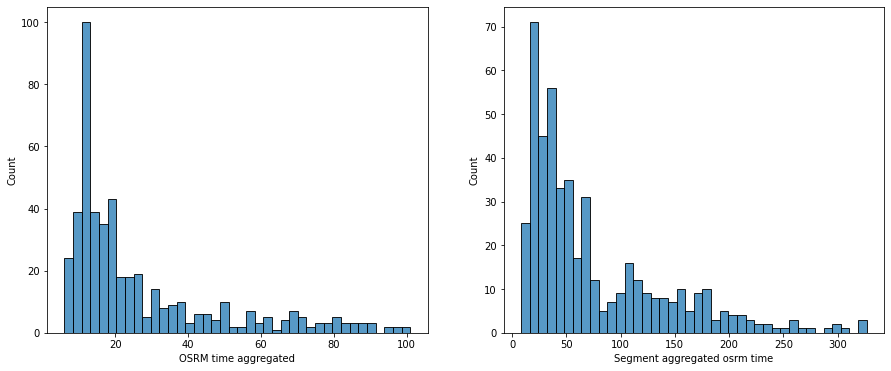

In [63]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax=ax.flatten()
sns.histplot(x='osrm_time', data=data_trip,ax=ax[0],bins=40) # aggregate OSRM time
ax[0].set_xlabel("OSRM time aggregated")
sns.histplot(x='segment_osrm_time_total',data=data_trip,ax=ax[1],bins=40) # segment aggregated osrm time
ax[1].set_xlabel("Segment aggregated osrm time")
plt.show()

The distributions are rightly skewed.The data contains outliers.The distribution are almost same

### Confidence interval of osrm time aggregated and segement osrm time aggregated




In [64]:
# find confidence interval
means_segment=[]
means_osrm=[]
nsim=1000 # 100 bootstrap simulations
sample_size=100 # sample size is 100
for _ in range(nsim):
  sample=data_trip['segment_osrm_time_total'].sample(sample_size)
  means_segment.append(sum(sample)/len(sample))

  sample=data_trip['osrm_time'].sample(sample_size)
  means_osrm.append(sum(sample)/len(sample))


# confidence interval for means
interval_segment=[np.percentile(means_segment,2.5),np.percentile(means_segment,97.5)] # 2.5th and 97.5th percentiles ,with 5% level of significance
interval_osrm=[np.percentile(means_osrm,2.5),np.percentile(means_osrm,97.5)]

print("Confidence interval for segment osrm time(aggregated): ",interval_segment)
print("Confidence interval for OSRM time(aggregated): ",interval_osrm)



Confidence interval for segment osrm time(aggregated):  [65.00775, 86.153]
Confidence interval for OSRM time(aggregated):  [23.0595, 30.730999999999998]


Confidence intervals are not.Time taken by delivery as per segment OSRM time is way less than the time taken by delivery as per osrm time. 

In [65]:
# first remove outliers
Q1=data_trip['segment_osrm_time_total'].quantile(0.25) 
Q3=data_trip['segment_osrm_time_total'].quantile(0.75)
IQR=Q3-Q1
segment=data_trip['segment_osrm_time_total']
logical=((Q1-1.5*IQR)<segment ) & (segment<(Q3+1.5*IQR))
segment_data=data_trip['segment_osrm_time_total'][logical]

# similarly do for od time
Q1=data_trip['osrm_time'].quantile(0.25) 
Q3=data_trip['osrm_time'].quantile(0.75)
IQR=Q3-Q1
osrm=data_trip['osrm_time']
logical=((Q1-1.5*IQR)<osrm ) & (osrm<(Q3+1.5*IQR))
osrm_data=data_trip['osrm_time'][logical]
test_statistics,p_value=st.ttest_ind(osrm_data,segment_data,
                                     equal_var=True, random_state=2022, alternative='two-sided')
print("Test-statistics:",test_statistics)
print("P-value:",p_value)


Test-statistics: -17.56295705456822
P-value: 1.6290285454404585e-59


According to p-value the means are not same.

### Hypothesis testing between osrm distance aggregated value and segment osrm distance aggregated value and visualization.

**Ho: osrm mean distance is same as osrm segmented distance**

**H1:otherwise**

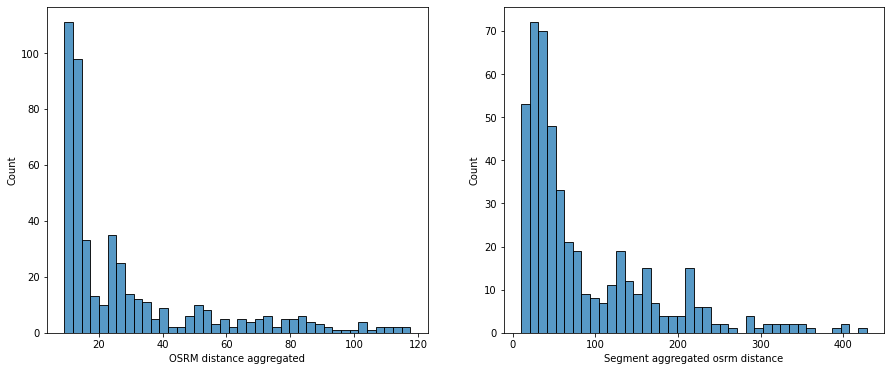

In [66]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax=ax.flatten()
sns.histplot(x='osrm_distance', data=data_trip,ax=ax[0],bins=40) # aggregate OSRM distance
ax[0].set_xlabel("OSRM distance aggregated")
sns.histplot(x='segment_osrm_distance_total',data=data_trip,ax=ax[1],bins=40) # segment aggregated osrm distance
ax[1].set_xlabel("Segment aggregated osrm distance")
plt.show()

right skewd distributions.Have outliers.we will remove them before carrying any t-test.

### Confidence interval of osrm distance aggregated and segement osrm distance aggregated


In [67]:
# find confidence interval
means_segment=[]
means_osrm=[]
nsim=1000 # 100 bootstrap simulations
sample_size=100 # sample size is 100
for _ in range(nsim):
  sample=data_trip['segment_osrm_distance_total'].sample(sample_size)
  means_segment.append(sum(sample)/len(sample))

  sample=data_trip['osrm_time'].sample(sample_size)
  means_osrm.append(sum(sample)/len(sample))


# confidence interval for means
interval_segment=[np.percentile(means_segment,2.5),np.percentile(means_segment,97.5)] # 2.5th and 97.5th percentiles ,with 5% level of significance
interval_osrm=[np.percentile(means_osrm,2.5),np.percentile(means_osrm,97.5)]

print("Confidence interval for segment osrm distance(aggregated): ",interval_segment)
print("Confidence interval for OSRM distance(aggregated): ",interval_osrm)



Confidence interval for segment osrm distance(aggregated):  [71.52735435000002, 100.67660464999999]
Confidence interval for OSRM distance(aggregated):  [23.17975, 30.34]


The mean OSRM distance is relatively less than the mean segment osrm distance 

In [68]:
# first remove outliers
Q1=data_trip['segment_osrm_distance_total'].quantile(0.25) 
Q3=data_trip['segment_osrm_distance_total'].quantile(0.75)
IQR=Q3-Q1
segment=data_trip['segment_osrm_distance_total']
logical=((Q1-1.5*IQR)<segment ) & (segment<(Q3+1.5*IQR))
segment_data=data_trip['segment_osrm_distance_total'][logical]

# similarly do for od time
Q1=data_trip['osrm_distance'].quantile(0.25) 
Q3=data_trip['osrm_distance'].quantile(0.75)
IQR=Q3-Q1
osrm=data_trip['osrm_distance']
logical=((Q1-1.5*IQR)<osrm ) & (osrm<(Q3+1.5*IQR))
osrm_data=data_trip['osrm_distance'][logical]
test_statistics,p_value=st.ttest_ind(osrm_data,segment_data,
                                     equal_var=True, random_state=2022, alternative='two-sided')
print("Test-statistics:",test_statistics)
print("P-value:",p_value)


Test-statistics: -16.971438595307465
P-value: 4.137727991255941e-56


According to p-value mean distances are not same as p-value is way less than 5% level of significance.

# Comparison & Visualization of time and distance fields:

actual_distance_to_destination,
       actual_time, osrm_time, osrm_distance,
       segment_actual_time_total, segment_osrm_time_total,
       segment_osrm_distance_total


The relation between time and distance is distance=time*speed
Here we can treat speed as a parameter.

We can have scatter plot as well as correlation

### actual_distance_to_destination vs actual_time

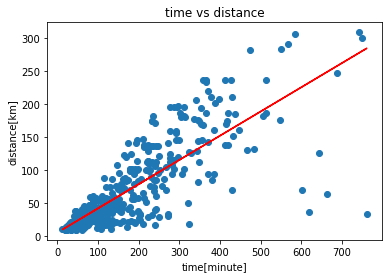

In [73]:

# calcualting a linear fit 
p=np.polyfit(data_trip['actual_time'],data_trip['actual_distance_to_destination'],deg=1) # fitting a simple linear regression
distance_pred=np.polyval(p,data_trip['actual_time']) # predicted distance

plt.scatter(data_trip['actual_time'],data_trip['actual_distance_to_destination'])
plt.plot(data_trip['actual_time'],distance_pred,color='r')
plt.xlabel('time[minute]')
plt.ylabel('distance[km]')
plt.title("time vs distance")
plt.show()


There are some distances(less than 50km) taken longest time.This might be due to the fault in the delivery or technical glitch.

### osrm_time vs osrm_distance

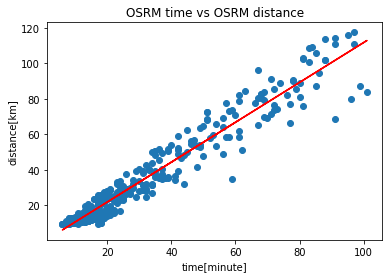

In [76]:
# calcualting a linear fit 
p=np.polyfit(data_trip['osrm_time'],data_trip['osrm_distance'],deg=1) # fitting a simple linear regression
distance_pred=np.polyval(p,data_trip['osrm_time']) # predicted distance

plt.scatter(data_trip['osrm_time'],data_trip['osrm_distance'])
plt.plot(data_trip['osrm_time'],distance_pred,color='r')
plt.xlabel('time[minute]')
plt.ylabel('distance[km]')
plt.title("OSRM time vs OSRM distance")
plt.show()


The line almost perfectly fit the data.More time taken,more distance to cover.

### segment_osrm_time_total vs segment_osrm_distance_total

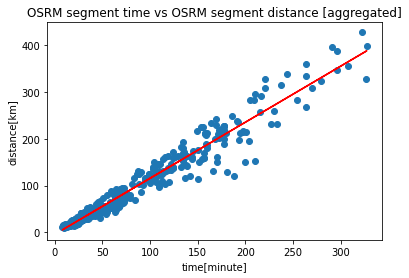

In [79]:
# calcualting a linear fit 
p=np.polyfit(data_trip['segment_osrm_time_total'],data_trip['segment_osrm_distance_total'],deg=1) # fitting a simple linear regression
distance_pred=np.polyval(p,data_trip['segment_osrm_time_total']) # predicted distance

plt.scatter(data_trip['segment_osrm_time_total'],data_trip['segment_osrm_distance_total'])
plt.plot(data_trip['segment_osrm_time_total'],distance_pred,color='r')
plt.xlabel('time[minute]')
plt.ylabel('distance[km]')
plt.title("OSRM segment time vs OSRM segment distance [aggregated]")
plt.show()


Here also the line almost perfectly the data.More segment time,more segment distance to cover.

# Column Normalization /Column Standardization using StandardScaler:

StandardScaler normalize the data so that mean of each column(attributes) becomes zero and variance becomes 1

In [82]:
cols_to_standarized=['start_scan_to_end_scan',
       'od_start_end_time_minute', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance',
       'segment_actual_time_total', 'segment_osrm_time_total',
       'segment_osrm_distance_total']

scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_trip[cols_to_standarized])
data_scaled

array([[-5.76110513e-04, -1.22644075e-03,  5.88713848e-01, ...,
         6.91425797e-01,  8.59330823e-01,  6.71684125e-01],
       [-1.80620579e-01, -1.83841438e-01, -3.97347755e-01, ...,
         6.02245751e-01, -4.02978713e-01, -3.63428751e-01],
       [-1.47454492e-01, -1.44280784e-01,  2.01589614e-01, ...,
        -1.26057958e-01, -3.11727421e-01, -7.45048332e-02],
       ...,
       [-6.73373860e-01, -6.75596835e-01, -2.30452223e-01, ...,
        -2.37533016e-01, -4.33395810e-01, -2.27711657e-01],
       [-6.73373860e-01, -6.72652145e-01, -3.22180719e-01, ...,
        -2.82123039e-01, -3.87770164e-01, -4.64441824e-01],
       [-5.17019454e-01, -5.13527397e-01, -6.00903971e-01, ...,
        -7.28023269e-01, -6.46315491e-01, -6.48967122e-01]])

In [83]:
data_scaled.mean(axis=0)

array([-5.21362594e-17, -2.27165130e-16, -1.07996537e-16,  8.19284077e-17,
        4.84122409e-17,  3.72401853e-18,  1.06134528e-16, -7.07563521e-17,
        7.44803706e-17])

In [84]:
data_scaled.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Recommendation:

1. There is a huge discrepency between OSRM and actual parameters thats need to be investigated.

2. There are distances(less than 50km) takes lot of time to deliver the product.Investigation is needed.

3. Sotuh,North and west have heavy presence but on the other hand east,central corridors have less presence.It would be worth if we increase our presense in these regions.

4. Maharash being heighest in terms of production as well as deliveries followed by Karnataka.

5. Unfortunately Delhi being capital city has less presence compared to Maharashtra,Karnataka.We need to our increase in Delhi.

6. We have very limited presence in states like Uttrakhand,Chhatisgarh,Goa,Jammu and Kashmir.It would be worth if we increase our presence.


                                                          Thats All until next time